In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as web
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import pandas_datareader as web 

tcs_data = web.get_data_yahoo(['TCS.NS'], start=datetime.datetime(2022, 1, 1), end=datetime.datetime(2022, 5,1))['Close']

print(tcs_data.head(10))

Symbols          TCS.NS
Date                   
2022-01-03  3817.750000
2022-01-04  3884.750000
2022-01-05  3860.949951
2022-01-06  3807.449951
2022-01-07  3853.500000
2022-01-10  3879.850098
2022-01-11  3915.899902
2022-01-12  3859.899902
2022-01-13  3897.899902
2022-01-14  3968.149902


In [4]:
#tcs_data

In [5]:
tcs_data.to_csv("tcs1.csv")

In [6]:
df = pd.read_csv("tcs1.csv")
print(df.head())

         Date       TCS.NS
0  2022-01-03  3817.750000
1  2022-01-04  3884.750000
2  2022-01-05  3860.949951
3  2022-01-06  3807.449951
4  2022-01-07  3853.500000


In [7]:
type(df.Date)

pandas.core.series.Series

In [8]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
del df['Date']

In [10]:
df

,TCS.NS
Date,
2022-01-03,3817.750000
2022-01-04,3884.750000
2022-01-05,3860.949951
2022-01-06,3807.449951
2022-01-07,3853.500000
2022-01-10,3879.850098
2022-01-11,3915.899902
2022-01-12,3859.899902
2022-01-13,3897.899902


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set()

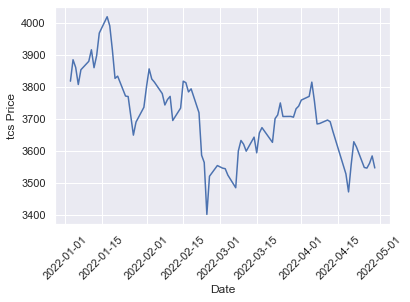

In [13]:
plt.ylabel('tcs Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df.index,df["TCS.NS"])

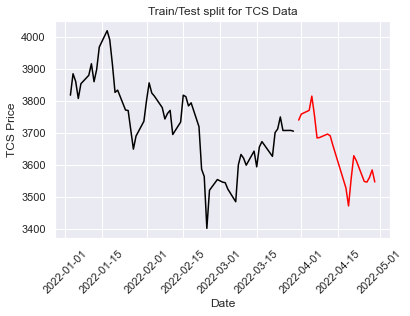

In [28]:
train = df[df.index < pd.to_datetime("2022-03-30", format='%Y-%m-%d')]
test =  df[df.index > pd.to_datetime("2022-03-30", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('TCS Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for TCS Data")
plt.show()

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
y = train['TCS.NS']


In [31]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))



C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [32]:
ARMAmodel = ARMAmodel.fit()

In [33]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


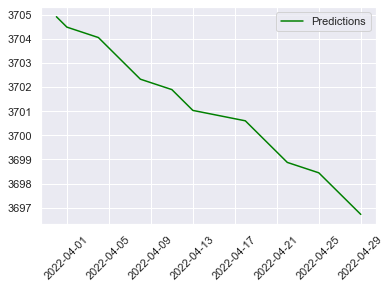

In [34]:
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')

plt.legend()

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["TCS.NS"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  109.57639550515405


In [36]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters foun

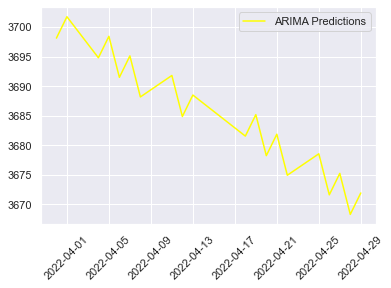

In [37]:
ARIMAmodel = ARIMA(y, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
#print(y_pred_df)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["TCS.NS"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  96.99981381718536


In [25]:
#d1=pd.to_datetime('2022-03-01',format='%Y-%m-%d')
#d2=pd.to_datetime('2022-04-01',format='%Y-%m-%d')


In [26]:
#y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

In [27]:
#pd.to_DatetimeIndex(d2)